In [1]:
%reload_ext autoreload
%autoreload 2

# Classification data using scikit-learn

Source:
- <https://developer.ibm.com/learningpaths/learning-path-machine-learning-for-developers/learn-classification-algorithms/>
- <https://github.com/IBM/ml-learning-path-assets/blob/master/notebooks/classification_with_scikit-learn.ipynb>


Classification problems are those in which the feature to be predicted contains categories of values. Each of these categories are considered as a class into which the predicted value will fall into and hence has its name, classification.

In this notebook, we'll use scikit-learn to predict classes. scikit-learn provides implementations of many classification algorithms. In here, we have done a comparative study of 5 different classification algorithms. 

To help visualize what we are doing, we'll use 2D and 3D charts to show how the classes look (with 3 selected dimensions) with matplotlib and scikitplot python libraries.


<a id="top"></a>
## Table of Contents

1. [Load libraries](#load_libraries)
2. [Data exploration](#explore_data)
3. [Prepare data for building classification model](#prepare_data)
4. [Split data into train and test sets](#split_data)
5. [Helper methods for graph generation](#helper_methods)
6. [Build Naive Bayes classification model](#model_nb)
7. [Build Logistic Regression classification model](#model_lrc)
8. [Build K-Nearest classification model](#model_knn) 
9. [Build Kernel SVM classification model](#model_svm) 
10. [Build Random Forest classification model](#model_rfc)
11. [Comparative study of different classification algorithms](#compare_classification)

### Quick set of instructions to work through the notebook

If you are new to Notebooks, here's a quick overview of how to work in this environment.

1. The notebook has 2 types of cells - markdown (text) such as this and code such as the one below. 
2. Each cell with code can be executed independently or together (see options under the Cell menu). When working in this notebook, we will be running one cell at a time because we need to make code changes to some of the cells.
3. To run the cell, position cursor in the code cell and click the Run (arrow) icon. The cell is running when you see the * next to it. Some cells have printable output.
4. Work through this notebook by reading the instructions and executing code cell by cell. Some cells will require modifications before you run them. 

<a id="load_libraries"></a>
## 1. Load libraries
[Top](#top)

Install python modules
NOTE! Some pip installs require a kernel restart.
The shell command pip install is used to install Python modules. Some installs require a kernel restart to complete. To avoid confusing errors, run the following cell once and then use the Kernel menu to restart the kernel before proceeding.

In [2]:
import sys
import io

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd, numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import scikitplot as skplt


<a id="explore_data"></a>
## 2. Data exploration
[Top](#top)


Original data from <https://raw.githubusercontent.com/IBM/ml-learning-path-assets/master/data/mergedcustomers_missing_values_GENDER.csv>

In [3]:
df_churn_pd = pd.read_csv("/data/IFI8410/sess09/mergedcustomers_missing_values_GENDER.csv")
df_churn_pd.head()

,ID,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,1703,Medium,NaN,M,2,28766.9,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,1704,Low,NaN,M,2,91272.2,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,1705,Low,NaN,S,0,73228.3,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,1706,High,M,M,1,64792.3,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,1707,High,F,S,0,93322.1,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950


In [4]:

print("The dataset contains columns of the following data types : \n" +str(df_churn_pd.dtypes))


The dataset contains columns of the following data types : 
ID                             int64
CHURNRISK                     object
GENDER                        object
STATUS                        object
CHILDREN                       int64
ESTINCOME                    float64
HOMEOWNER                     object
AGE                            int64
TOTALDOLLARVALUETRADED       float64
TOTALUNITSTRADED               int64
LARGESTSINGLETRANSACTION     float64
SMALLESTSINGLETRANSACTION    float64
PERCENTCHANGECALCULATION     float64
DAYSSINCELASTLOGIN             int64
DAYSSINCELASTTRADE             int64
NETREALIZEDGAINS_YTD         float64
NETREALIZEDLOSSES_YTD        float64
dtype: object


In [5]:
#notice that Gender has three missing values. This will be handled in one of the preprocessing steps that is to follow. 
print("The dataset contains following number of records for each of the columns : \n" +str(df_churn_pd.count()))


The dataset contains following number of records for each of the columns : 
ID                           2066
CHURNRISK                    2066
GENDER                       2063
STATUS                       2066
CHILDREN                     2066
ESTINCOME                    2066
HOMEOWNER                    2066
AGE                          2066
TOTALDOLLARVALUETRADED       2066
TOTALUNITSTRADED             2066
LARGESTSINGLETRANSACTION     2066
SMALLESTSINGLETRANSACTION    2066
PERCENTCHANGECALCULATION     2066
DAYSSINCELASTLOGIN           2066
DAYSSINCELASTTRADE           2066
NETREALIZEDGAINS_YTD         2066
NETREALIZEDLOSSES_YTD        2066
dtype: int64


Each category within the churnrisk column has the following count : 
CHURNRISK
High      983
Low       699
Medium    384
dtype: int64


Text(0, 0.5, 'Frequency')

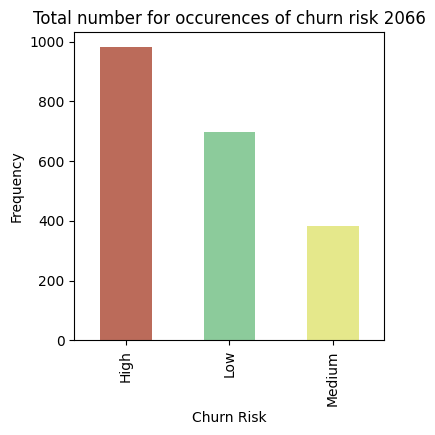

In [6]:
print( "Each category within the churnrisk column has the following count : ")
print(df_churn_pd.groupby(['CHURNRISK']).size())
#bar chart to show split of data
index = ['High','Medium','Low']
churn_plot = df_churn_pd['CHURNRISK'].value_counts(sort=True, ascending=False).plot(kind='bar',figsize=(4,4),title="Total number for occurences of churn risk " + str(df_churn_pd['CHURNRISK'].count()), color=['#BB6B5A','#8CCB9B','#E5E88B'])
churn_plot.set_xlabel("Churn Risk")
churn_plot.set_ylabel("Frequency")

<a id="prepare_data"></a>
## 3. Data preparation
[Top](#top)

Data preparation is a very important step in machine learning model building. This is because the model can perform well only when the data it is trained on is good and well prepared. Hence, this step consumes the bulk of a data scientist's time spent building models.

During this process, we identify categorical columns in the dataset. Categories needed to be indexed, which means the string labels are converted to label indices. These label indices are encoded using One-hot encoding to a binary vector with at most a single-value indicating the presence of a specific feature value from among the set of all feature values. This encoding allows algorithms which expect continuous features to use categorical features.

Final step in the data preparation process is to assemble all the categorical and non-categorical columns into a feature vector. We use VectorAssembler for this. VectorAssembler is a transformer that combines a given list of columns into a single vector column. It is useful for combining raw features and features generated by different feature transformers into a single feature vector, in order to train ML models.

In [7]:

#remove columns that are not required
df_churn_pd = df_churn_pd.drop(['ID'], axis=1)

df_churn_pd.head()


,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,Medium,NaN,M,2,28766.9,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,Low,NaN,M,2,91272.2,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,Low,NaN,S,0,73228.3,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,High,M,M,1,64792.3,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,High,F,S,0,93322.1,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950


In [8]:
# Defining the categorical columns 
categoricalColumns = ['GENDER', 'STATUS', 'HOMEOWNER']

print("Categorical columns : " )
print(categoricalColumns)

impute_categorical = SimpleImputer(strategy="most_frequent")
onehot_categorical =  OneHotEncoder(handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[('impute',impute_categorical),('onehot',onehot_categorical)])

Categorical columns : 
['GENDER', 'STATUS', 'HOMEOWNER']


In [9]:
# Defining the numerical columns 
numericalColumns = df_churn_pd.select_dtypes(include=[float,int]).columns

print("Numerical columns : " )
print(numericalColumns)

scaler_numerical = StandardScaler()

numerical_transformer = Pipeline(steps=[('scale',scaler_numerical)])


Numerical columns : 
Index(['CHILDREN', 'ESTINCOME', 'AGE', 'TOTALDOLLARVALUETRADED',
       'TOTALUNITSTRADED', 'LARGESTSINGLETRANSACTION',
       'SMALLESTSINGLETRANSACTION', 'PERCENTCHANGECALCULATION',
       'DAYSSINCELASTLOGIN', 'DAYSSINCELASTTRADE', 'NETREALIZEDGAINS_YTD',
       'NETREALIZEDLOSSES_YTD'],
      dtype='object')


In [10]:
preprocessorForCategoricalColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns)],
                                            remainder="passthrough")
preprocessorForAllColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns),('num',numerical_transformer,numericalColumns)],
                                            remainder="passthrough")


#. The transformation happens in the pipeline. Temporarily done here to show what intermediate value looks like
df_churn_pd_temp = preprocessorForCategoricalColumns.fit_transform(df_churn_pd)
print("Data after transforming :")
print(df_churn_pd_temp)

df_churn_pd_temp_2 = preprocessorForAllColumns.fit_transform(df_churn_pd)
print("Data after transforming :")
print(df_churn_pd_temp_2)

Data after transforming :
[[1.0 0.0 0.0 ... 13 0.0 152.76525]
 [1.0 0.0 0.0 ... 10 1349.635 0.0]
 [1.0 0.0 0.0 ... 5 1123.6125 0.0]
 ...
 [1.0 0.0 0.0 ... 11 0.0 82.50825]
 [1.0 0.0 0.0 ... 5 930.093 0.0]
 [0.0 1.0 0.0 ... 8 1041.604 0.0]]
Data after transforming :
[[1.0 0.0 0.0 ... -0.6792731303453047 -0.5106065181930338 'Medium']
 [1.0 0.0 0.0 ... 1.8354629319820521 -0.7959345330293706 'Low']
 [1.0 0.0 0.0 ... 1.4143217110983428 -0.7959345330293706 'Low']
 ...
 [1.0 0.0 0.0 ... -0.6792731303453047 -0.6418293606808149 'Medium']
 [1.0 0.0 0.0 ... 1.053742394902809 -0.7959345330293706 'Low']
 [0.0 1.0 0.0 ... 1.261517632686496 -0.7959345330293706 'Low']]


In [12]:
# prepare data frame for splitting data into train and test datasets

features = []
features = df_churn_pd.drop(['CHURNRISK'], axis=1)

label_churn = pd.DataFrame(df_churn_pd, columns = ['CHURNRISK']) 
label_encoder = LabelEncoder()
label = df_churn_pd['CHURNRISK']

label = label_encoder.fit_transform(label)
print("Encoded value of Churnrisk after applying label encoder : " + str(label))




Encoded value of Churnrisk after applying label encoder : [2 1 1 ... 2 1 1]


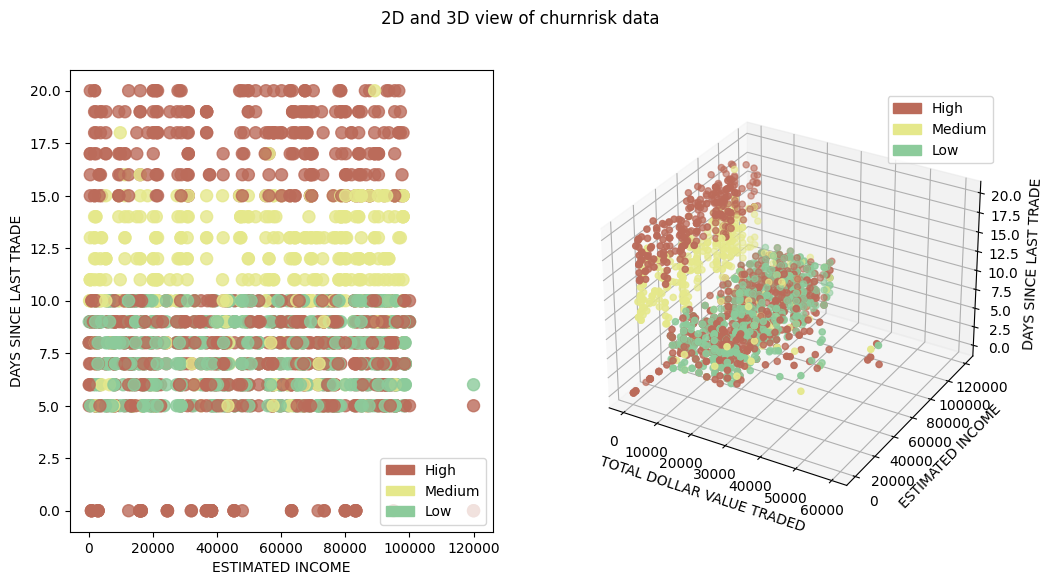

In [13]:
area = 75
x = df_churn_pd['ESTINCOME']
y = df_churn_pd['DAYSSINCELASTTRADE']
z = df_churn_pd['TOTALDOLLARVALUETRADED']

pop_a = mpatches.Patch(color='#BB6B5A', label='High')
pop_b = mpatches.Patch(color='#E5E88B', label='Medium')
pop_c = mpatches.Patch(color='#8CCB9B', label='Low')
def colormap(risk_list):
    cols=[]
    for l in risk_list:
        if l==0:
            cols.append('#BB6B5A')
        elif l==2:
            cols.append('#E5E88B')
        elif l==1:
            cols.append('#8CCB9B')
    return cols

fig = plt.figure(figsize=(12,6))
fig.suptitle('2D and 3D view of churnrisk data')

# First subplot
ax = fig.add_subplot(1, 2,1)

ax.scatter(x, y, alpha=0.8, c=colormap(label), s= area)
ax.set_ylabel('DAYS SINCE LAST TRADE')
ax.set_xlabel('ESTIMATED INCOME')

plt.legend(handles=[pop_a,pop_b,pop_c])

# Second subplot
ax = fig.add_subplot(1,2,2, projection='3d')

ax.scatter(z, x, y, c=colormap(label), marker='o')

ax.set_xlabel('TOTAL DOLLAR VALUE TRADED')
ax.set_ylabel('ESTIMATED INCOME')
ax.set_zlabel('DAYS SINCE LAST TRADE')

plt.legend(handles=[pop_a,pop_b,pop_c])

plt.show()


<a id="split_data"></a>
## 4. Split data into test and train
[Top](#top)



In [14]:

X_train, X_test, y_train, y_test = train_test_split(features,label , random_state=0)

print("Dimensions of datasets that will be used for training : Input features"+str(X_train.shape)+ 
      " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test.shape)+ 
      " Output label" + str(y_test.shape))



Dimensions of datasets that will be used for training : Input features(1549, 15) Output label(1549,)
Dimensions of datasets that will be used for testing : Input features(517, 15) Output label(517,)



<a id="helper_methods"></a>
## 5. Helper methods for graph generation
[Top](#top)



In [15]:
def colormap(risk_list):
    cols=[]
    for l in risk_list:
        if l==0:
            cols.append('#BB6B5A')
        elif l==2:
            cols.append('#E5E88B')
        elif l==1:
            cols.append('#8CCB9B')
    return cols

def two_d_compare(y_test,y_pred,model_name):
    #y_pred = label_encoder.fit_transform(y_pred)
    #y_test = label_encoder.fit_transform(y_test)
    area = (12 * np.random.rand(40))**2 
    plt.subplots(ncols=2, figsize=(10,4))
    plt.suptitle('Actual vs Predicted data : ' +model_name + '. Accuracy : %.2f' % accuracy_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test['ESTINCOME'], X_test['DAYSSINCELASTTRADE'], alpha=0.8, c=colormap(y_test))
    plt.title('Actual')
    plt.legend(handles=[pop_a,pop_b,pop_c])

    plt.subplot(122)
    plt.scatter(X_test['ESTINCOME'], X_test['DAYSSINCELASTTRADE'],alpha=0.8, c=colormap(y_pred))
    plt.title('Predicted')
    plt.legend(handles=[pop_a,pop_b,pop_c])

    plt.show()
    
x = X_test['TOTALDOLLARVALUETRADED']
y = X_test['ESTINCOME']
z = X_test['DAYSSINCELASTTRADE']

pop_a = mpatches.Patch(color='#BB6B5A', label='High')
pop_b = mpatches.Patch(color='#E5E88B', label='Medium')
pop_c = mpatches.Patch(color='#8CCB9B', label='Low')

def three_d_compare(y_test,y_pred,model_name):
    fig = plt.figure(figsize=(12,10))
    fig.suptitle('Actual vs Predicted (3D) data : ' +model_name + '. Accuracy : %.2f' % accuracy_score(y_test, y_pred))
    
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(x, y, z, c=colormap(y_test), marker='o')
    ax.set_xlabel('TOTAL DOLLAR VALUE TRADED')
    ax.set_ylabel('ESTIMATED INCOME')
    ax.set_zlabel('DAYS SINCE LAST TRADE')
    plt.legend(handles=[pop_a,pop_b,pop_c])
    plt.title('Actual')

    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(x, y, z, c=colormap(y_pred), marker='o')
    ax.set_xlabel('TOTAL DOLLAR VALUE TRADED')
    ax.set_ylabel('ESTIMATED INCOME')
    ax.set_zlabel('DAYS SINCE LAST TRADE')
    plt.legend(handles=[pop_a,pop_b,pop_c])
    plt.title('Predicted')

    plt.show()
    

def model_metrics(y_test,y_pred):
    print("Decoded values of Churnrisk after applying inverse of label encoder : " + str(np.unique(y_pred)))

    skplt.metrics.plot_confusion_matrix(y_test,y_pred,text_fontsize="small",cmap='Greens',figsize=(6,4))
    plt.show()
    
    #print("The classification report for the model : \n\n"+ classification_report(y_test, y_pred))


<a id="model_nb"></a>
## 6. Build Naive Bayes classification model
[Top](#top)

Applies the bayesian theorem to calculate the probabilty of a data point belonging to a particular class. Given the probability of certain related values,the formula to calculate the probabilty of an event B given event A to occur is calculated as follows.

In [16]:
from sklearn.naive_bayes import MultinomialNB

model_name = 'Naive Bayes Classifier'

nbClassifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

nb_model = Pipeline(steps=[('preprocessor', preprocessorForCategoricalColumns),('classifier', nbClassifier)]) 

nb_model.fit(X_train,y_train)

y_pred_nb= nb_model.predict(X_test)


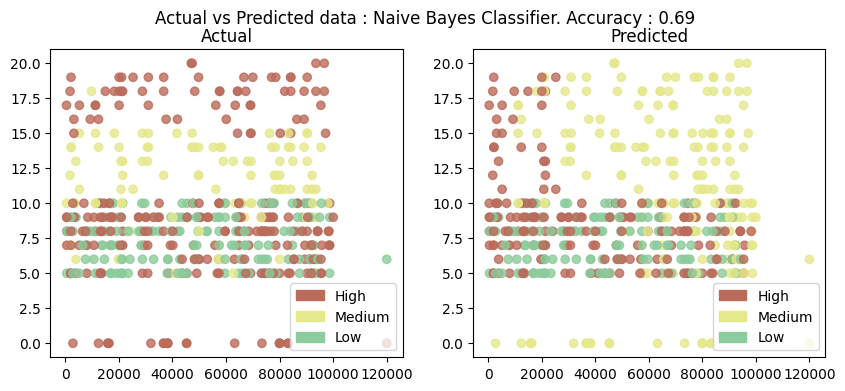

In [18]:
two_d_compare(y_test,y_pred_nb,model_name)

In [ ]:
y_test = label_encoder.inverse_transform(y_test)
y_pred_nb = label_encoder.inverse_transform(y_pred_nb)
model_metrics(y_test,y_pred_nb)

<a id="model_lrc"></a>
## 7. Build Logistic Regression classification model
[Top](#top)

A logistic function is applied to the outcome of linear regression. The logistic function is also referred to as sigmoid function. This outputs a value between 0 and 1. We then select a line that depends on the use case, and any data point with probability value above the line is classified into the class represented by 1 and the data point below the line is classified into the class represented by 0.

In [ ]:
from sklearn.linear_model import LogisticRegression

model_name = "Logistic Regression Classifier"

logisticRegressionClassifier = LogisticRegression(random_state=0,multi_class='auto',solver='lbfgs',max_iter=1000)

lrc_model = Pipeline(steps=[('preprocessor', preprocessorForCategoricalColumns),
                            ('classifier', logisticRegressionClassifier)]) 

lrc_model.fit(X_train,y_train)

y_pred_lrc = lrc_model.predict(X_test)


In [ ]:
y_test = label_encoder.transform(y_test)
two_d_compare(y_test,y_pred_lrc,model_name)

In [ ]:
y_test = label_encoder.inverse_transform(y_test)
y_pred_lrc = label_encoder.inverse_transform(y_pred_lrc)
model_metrics(y_test,y_pred_lrc)

<a id="model_knn"></a>
## 8. Build K-Nearest classification model
[Top](#top)

K number of nearest points around the data point to be predeicted are taken into consideration. These K points at this time, already belong to a class. The data point under consideration, is said to belong to the class with which most number of points from these k points belong to. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_name = "K-Nearest Neighbor Classifier"

knnClassifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)

knn_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('classifier', knnClassifier)]) 

knn_model.fit(X_train,y_train)

y_pred_knn = knn_model.predict(X_test)




In [ ]:
y_test = label_encoder.transform(y_test)
two_d_compare(y_test,y_pred_knn,model_name)

In [ ]:
y_test = label_encoder.inverse_transform(y_test)
y_pred_knn = label_encoder.inverse_transform(y_pred_knn)
model_metrics(y_test,y_pred_knn)

<a id="model_svm"></a>
## 9. Build Kernel SVM classification model
[Top](#top)

Support Vector Machines outputs an optimal line of separation between the classes based on the training data served as input. This line of separation is called a hyperplane in a multi dimensional environment. SVM takes outliers that lie pretty close to another class into consideration to derive this separating hyperplane. Once the model is constructed with this hyperplane, any new point to be predicted will now check to see which side of the hyperplane this values lies in.

In [ ]:
from sklearn.svm import SVC

model_name = 'Kernel SVM Classifier'

svmClassifier = SVC(kernel='rbf', gamma= 'auto')

svm_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('classifier', svmClassifier)]) 

svm_model.fit(X_train,y_train)

y_pred_svm = svm_model.predict(X_test)


In [ ]:
y_test = label_encoder.transform(y_test)
#y_pred_svm = label_encoder.transform(y_pred_svm)
two_d_compare(y_test,y_pred_svm,model_name)

In [ ]:
y_test = label_encoder.inverse_transform(y_test)
y_pred_svm = label_encoder.inverse_transform(y_pred_svm)
model_metrics(y_test,y_pred_svm)

<a id="model_rfc"></a>
## 10. Build Random Forest classification model
[Top](#top)

Decision tree algorithms are efficient in eliminating columns that don't add value in predicting the output and in some cases, we are even able to see how a prediction was derived by backtracking the tree. However, this algorithm doesn't perform individually when the trees are huge and are hard to interpret. Such models are often referred to as weak models. The model performance is however improvised by taking an average of several such decision trees derived from the subsets of the training data. This approach is called the Random Forest classification.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_name = "Random Forest Classifier"

randomForestClassifier = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

rfc_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('classifier', randomForestClassifier)]) 

rfc_model.fit(X_train,y_train)

y_pred_rfc = rfc_model.predict(X_test)


In [ ]:
y_test = label_encoder.transform(y_test)
two_d_compare(y_test,y_pred_rfc,model_name)

#three_d_compare(y_test,y_pred_rfc,model_name)

In [ ]:
y_test = label_encoder.inverse_transform(y_test)
y_pred_rfc = label_encoder.inverse_transform(y_pred_rfc)
model_metrics(y_test,y_pred_rfc)



<a id="compare_classification"></a>
## 11. Comparative study of different classification algorithms. 
[Top](#top)

In the bar chart below, we have compared the different classification algorithm against the actual values. 
 

In [ ]:
uniqueValues, occurCount = np.unique(y_test, return_counts=True)
frequency_actual = (occurCount[0],occurCount[2],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred_knn, return_counts=True)
frequency_predicted_knn = (occurCount[0],occurCount[2],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred_rfc, return_counts=True)
frequency_predicted_rfc = (occurCount[0],occurCount[2],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred_lrc, return_counts=True)
frequency_predicted_lrc = (occurCount[0],occurCount[2],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred_svm, return_counts=True)
frequency_predicted_svm = (occurCount[0],occurCount[2],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred_nb, return_counts=True)
frequency_predicted_nb = (occurCount[0],occurCount[2],occurCount[1])

n_groups = 3
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, frequency_actual, bar_width,
alpha=opacity,
color='g',
label='Actual')

rects2 = plt.bar(index + bar_width, frequency_predicted_nb, bar_width,
alpha=opacity,
color='pink',
label='Naive Bayesian - Predicted')

rects3 = plt.bar(index + bar_width*2, frequency_predicted_lrc, bar_width,
alpha=opacity,
color='y',
label='Logistic Regression - Predicted')

rects4 = plt.bar(index + bar_width*3, frequency_predicted_knn, bar_width,
alpha=opacity,
color='b',
label='K-Nearest Neighbor - Predicted')

rects5 = plt.bar(index + bar_width*4, frequency_predicted_svm, bar_width,
alpha=opacity,
color='red',
label='Kernel SVM - Predicted')

rects6 = plt.bar(index + bar_width*5, frequency_predicted_rfc, bar_width,
alpha=opacity,
color='purple',
label='Random Forest - Predicted')

plt.xlabel('Churn Risk')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted frequency.')
plt.xticks(index + bar_width, ('High', 'Medium', 'Low'))
plt.legend()

plt.tight_layout()
plt.show()

In general, we see that the predictions around the Medium values is low on accuracy. One reason for that could be that the number of entries for the Medium values were much less represented than High and Low values. Further testing can be done by either increasing the number of Medium entries or involving several data fabrication techniques. 

<p><font size=-1 color=gray>
&copy; Copyright 2019 IBM Corp. All Rights Reserved.
<p>
Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file
except in compliance with the License. You may obtain a copy of the License at
https://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the
License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either
express or implied. See the License for the specific language governing permissions and
limitations under the License.
</font></p>